# Работа со строковыми значениями

## Задачи для совместного разбора

1. Вывести на экран данные из словаря `obj` построчно в виде `k = v`, задав формат таким образом, чтобы знак равенства оказался на одной и той же позиции во всех строках. Строковые литералы обернуть в кавычки.

In [1]:
obj = {
    "home_page": "https://github.com/pypa/sampleproject",
    "keywords": "sample setuptools development",
    "license": "MIT",
}

In [101]:
name = "Alex"

print(f"{name=}")
print(f"{name:10}")
print(f"{name:^10}")

name='Alex'
Alex      
   Alex   


In [3]:
for k, v in obj.items():
    print(f"{k:10} = '{v}'")

home_page  = 'https://github.com/pypa/sampleproject'
keywords   = 'sample setuptools development'
license    = 'MIT'


2. Написать регулярное выражение,которое позволит найти номера групп студентов.

In [226]:
import pandas as pd

obj = pd.Series(["Евгения гр.ПМ19-1", "Илья пм 20-4", "Анна 20-3", "", "bebra"])
obj

0    Евгения гр.ПМ19-1
1         Илья пм 20-4
2            Анна 20-3
3                     
4                bebra
dtype: object

In [129]:
import re

# patt = re.compile(r"(?:ПМ)?\s?\d+-\d", re.I)
patt = re.compile(r"(?:ПМ)?\s?\d+-\d", re.I)
for item in obj:
    print(f"{item:20}", patt.findall(item))

Евгения гр.ПМ19-1    ['ПМ19-1']
Илья пм 20-4         ['пм 20-4']
Анна 20-3            [' 20-3']
                     []
bebra                []


In [130]:
obj.str.findall(patt)

0     [ПМ19-1]
1    [пм 20-4]
2      [ 20-3]
3           []
4           []
dtype: object

In [131]:
obj.str.findall(patt).map(len)

0    1
1    1
2    1
3    0
4    0
dtype: int64

3. Разбейте текст формулировки задачи 2 на слова.

In [8]:
import nltk

In [9]:
text = "Написать регулярное выражение,которое позволит найти номера групп студентов."
text.split() # не подходит (запятая)

['Написать',
 'регулярное',
 'выражение,которое',
 'позволит',
 'найти',
 'номера',
 'групп',
 'студентов.']

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.word_tokenize(text)

['Написать',
 'регулярное',
 'выражение',
 ',',
 'которое',
 'позволит',
 'найти',
 'номера',
 'групп',
 'студентов',
 '.']

In [12]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+") # \w+ = [a-zA-Z0-9_]
tokenizer.tokenize(text)

['Написать',
 'регулярное',
 'выражение',
 'которое',
 'позволит',
 'найти',
 'номера',
 'групп',
 'студентов']

In [13]:
nltk.sent_tokenize("Мы сегодня устали. Мы учимся до 10")

['Мы сегодня устали.', 'Мы учимся до 10']

## Лабораторная работа 6

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from iteration_utilities import flatten

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sanha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

### Форматирование строк

1\. Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в виде `pd.DataFrame` `recipes` При помощи форматирования строк выведите информацию об id рецепта и времени выполнения 5 случайных рецептов в виде таблицы следующего вида:

    
    |      id      |  minutes  |
    |--------------------------|
    |    61178     |    65     |
    |    202352    |    80     |
    |    364322    |    150    |
    |    26177     |    20     |
    |    224785    |    35     |
    
Обратите внимание, что ширина столбцов заранее неизвестна и должна рассчитываться динамически, в зависимости от тех данных, которые были выбраны. 

In [4]:
recipes = pd.read_csv('recipes_sample.csv')
for_table = recipes.sample(n=5)
for_table

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
28858,vichyssoise soup,55448,60,51641,2003-03-03,NaN,this is a great cold and creamy soup for a hot...,NaN
11969,giant stuffed beef burger,17237,50,21399,2002-01-17,NaN,these are easy and delicious cooked outside on...,NaN
2829,berry cobbler cakes,382548,60,135470,2009-07-23,8.0,is it a cobbler or a cupcake or a muffin? you ...,NaN
28875,viennese tarts,164678,20,237715,2006-04-17,NaN,these are light and delicious crumbly little c...,3.0
27934,tourtiere quebecoise meat pie,214008,80,122877,2007-02-27,14.0,"this recipe is from emeril's ""there's a chef i...",NaN


In [5]:
print(f"|{'id':^14}| {'minutes':^10}|\n|{'-'*26}|")
for index, row in for_table.iterrows():
    print(f"|{row['id']:^14}| {row['minutes']:^10}|")

|      id      |  minutes  |
|--------------------------|
|    55448     |     60    |
|    17237     |     50    |
|    382548    |     60    |
|    164678    |     20    |
|    214008    |     80    |


2\. Напишите функцию `show_info`, которая по данным о рецепте создает строку (в смысле объекта python) с описанием следующего вида:

```
"Название Из Нескольких Слов"

1. Шаг 1.
2. Шаг 2.
----------
Автор: contributor_id
Среднее время приготовления: minutes минут
```

    
Данные для создания строки получите из файлов `recipes_sample.csv` (__ЛР2__) и `steps_sample.xml` (__ЛР3__). 
Вызовите данную функцию для рецепта с id `170895` и выведите (через `print`) полученную строку на экран.

In [6]:
recipes_ind_col = pd.read_csv('recipes_sample.csv', index_col=1)

In [7]:
with open(
    "steps_sample.xml",
    "r",
    encoding="utf-8"
) as fp:
    xml = BeautifulSoup(fp)

In [8]:
steps_for_recipes = {}
recipes_xml = xml.find_all("recipe")
for recip in recipes_xml:
    steps_for_recipes.update({int(recip.find("id").get_text()):[st.text for st in recip.find_all("step")]})

In [9]:
recipes_ind_col.loc[170895]

name                         leeks and parsnips  sauteed or creamed
minutes                                                          27
contributor_id                                                 8377
submitted                                                2006-05-31
n_steps                                                        21.0
description       this is good sauteed only or creamed. very eas...
n_ingredients                                                   9.0
Name: 170895, dtype: object

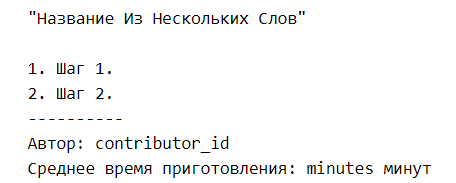

In [10]:
def show_info(name, steps, minutes, author_id):
    print(f'"{name.title()}"\n')
    for st in range(len(steps)):
        print(f'{st+1}. {steps[st]}')
    print(f'----------')
    print(f'Автор: {author_id}')
    print(f'Среднее время приготовления: {minutes} минут')
    
show_info(
        name="george s at the cove black bean soup",
        steps=["clean the leeks and discard the dark green portions","cut the leeks lengthwise then into one-inch pieces","melt the butter in a medium skillet , med"],
        minutes=90,
        author_id=35193
    )

"George S At The Cove Black Bean Soup"

1. clean the leeks and discard the dark green portions
2. cut the leeks lengthwise then into one-inch pieces
3. melt the butter in a medium skillet , med
----------
Автор: 35193
Среднее время приготовления: 90 минут


In [11]:
show_info(*recipes_ind_col[["name"]].loc[170895].values, steps_for_recipes[170895], *recipes_ind_col[["minutes"]].loc[170895].values, *recipes_ind_col[["contributor_id"]].loc[170895].values)

"Leeks And Parsnips  Sauteed Or Creamed"

1. clean the leeks and discard the dark green portions
2. cut the leeks lengthwise then into one-inch pieces
3. melt the butter in a medium skillet , med
4. heat
5. add the garlic and fry 'til fragrant
6. add leeks and fry until the leeks are tender , about 6-minutes
7. meanwhile , peel and chunk the parsnips into one-inch pieces
8. place in a steaming basket and steam 'til they are as tender as you prefer
9. i like them fork-tender
10. drain parsnips and add to the skillet with the leeks
11. add salt and pepper
12. gently sautee together for 5-minutes
13. at this point you can serve it , or continue on and cream it:
14. in a jar with a screw top , add the half-n-half and arrowroot
15. shake 'til blended
16. turn heat to low under the leeks and parsnips
17. pour in the arrowroot mixture , stirring gently as you pour
18. if too thick , gradually add the water
19. let simmer for a couple of minutes
20. taste to adjust seasoning , probably an addi

## Работа с регулярными выражениями

3\. Напишите регулярное выражение, которое ищет следующий паттерн в строке: число (1 цифра или более), затем пробел, затем слова: hour или hours или minute или minutes. Произведите поиск по данному регулярному выражению в каждом шаге рецепта с id 25082. Выведите на экран все непустые результаты, найденные по данному шаблону.

In [12]:
recipe25082 = steps_for_recipes[25082]
recipe25082

['proof yeast in half a cup of the water , with about a teaspoon of flour- let it sit , covered , until it becomes bubbly& active',
 'combine the rest of the water with the yeast / water in a large bowl , and gradually add about half of the flour',
 'stir the mixture about 100 times in the same direction , until it is well-mixed and strands are beginning to form',
 'stir in the salt and oil',
 'add the remaining flour half a cup at a time , stirring well , until it is too stiff to stir with a spoon',
 'turn out onto a lightly floured board and knead for about 20 minutes , adding flour as nescessary to keep the dough from sticking to the board',
 'the dough should be springy and nice to work with',
 'when it has been sufficiently kneaded , cover it with a damp cloth for about 10 minutes and wash and grease the bowl lightly',
 'after it has rested , knead the dough a few more times and place it in the bowl , covered with the damp cloth , a plastic bag , and maybe a plate',
 'let the doug

In [13]:
patt = re.compile(r'\d+\s(?:minutes|minute|hours|hour)')
for item in recipe25082:
    if len(patt.findall(item)) != 0:
        print(patt.findall(item))

['20 minutes']
['10 minutes']
['2 hours']
['10 minutes']
['20 minutes', '30 minutes']


4\. Напишите регулярное выражение, которое ищет шаблон вида "this..., but" _в начале строки_ . Между словом "this" и частью ", but" может находиться произвольное число букв, цифр, знаков подчеркивания и пробелов. Никаких других символов вместо многоточия быть не может. Пробел между запятой и словом "but" может присутствовать или отсутствовать.

Используя строковые методы `pd.Series`, выясните, для каких рецептов данный шаблон содержится в тексте описания. Выведите на экран количество таких рецептов и 3 примера подходящих описаний (текст описания должен быть виден на экране полностью).

In [15]:
desc = recipes[["description"]]
desc

,description
0,an original recipe created by chef scott meska...
1,my children and their friends ask for my homem...
2,"these were so go, it surprised even me."
3,my sister-in-law made these for us at a family...
4,i think a fondue is a very romantic casual din...
...,...
29995,this is based on a french recipe but i changed...
29996,"this is a traditional fresh plum cake, thought..."
29997,this is a traditional late summer early fall s...
29998,this is a delicious soup that i originally fou...


In [16]:
patt = re.compile(r"(?:this)\s[0-9a-zA-Zа-яА-ЯёЁ_ ]*(?:,)\s?(?:but)")
res = desc["description"].dropna().str.findall(patt)
res = res[res.apply(len) > 0]
print("Количество рецептов подходящих под условие: ", len(res), "\n")
print("Примеры: ", *res.sample(n=3).values, sep='\n')

Количество рецептов подходящих под условие:  728 

Примеры: 
['this recipe, but']
['this for years, but']
['this recipe makes, but']


5\. В текстах шагов рецептов обыкновенные дроби имеют вид "a / b". Используя регулярные выражения, уберите в тексте шагов рецепта с id 72367 пробелы до и после символа дроби. Выведите на экран шаги этого рецепта после их изменения.

In [17]:
recipe72367 = steps_for_recipes[72367]
recipe72367

['mix butter , flour , 1 / 3 c',
 'sugar and 1-1 / 4 t',
 'vanilla',
 'press into greased 9" springform pan',
 'mix cream cheese , 1 / 4 c',
 'sugar , eggs and 1 / 2 t',
 'vanilla beating until fluffy',
 'pour over dough',
 'combine apples , 1 / 3 c',
 'sugar and cinnamon',
 'arrange on top of cream cheese mixture and sprinkle with almonds',
 'bake at 350 for 45-55 minutes , or until tester comes out clean']

In [18]:
for item in recipe72367:
    print(re.sub(r"(\d+)\s/\s(\d+)", r'\1/\2', item))

mix butter , flour , 1/3 c
sugar and 1-1/4 t
vanilla
press into greased 9" springform pan
mix cream cheese , 1/4 c
sugar , eggs and 1/2 t
vanilla beating until fluffy
pour over dough
combine apples , 1/3 c
sugar and cinnamon
arrange on top of cream cheese mixture and sprinkle with almonds
bake at 350 for 45-55 minutes , or until tester comes out clean


### Сегментация текста

6\. Разбейте тексты шагов рецептов на слова при помощи пакета `nltk`. Посчитайте и выведите на экран кол-во уникальных слов среди всех рецептов. Словом называется любая последовательность алфавитных символов (для проверки можно воспользоваться `str.isalpha`). При подсчете количества уникальных слов не учитывайте регистр.

In [38]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
words = [tokenizer.tokenize(" ".join(text)) for key, text in steps_for_recipes.items()]
words = list(flatten(words))
words

['in',
 '1',
 '4',
 'cup',
 'butter',
 'saute',
 'carrots',
 'onion',
 'celery',
 'and',
 'broccoli',
 'stems',
 'for',
 '5',
 'minutes',
 'add',
 'thyme',
 'oregano',
 'and',
 'basil',
 'saute',
 '5',
 'minutes',
 'more',
 'add',
 'wine',
 'and',
 'deglaze',
 'pan',
 'add',
 'hot',
 'chicken',
 'stock',
 'and',
 'reduce',
 'by',
 'one',
 'third',
 'add',
 'worcestershire',
 'sauce',
 'tabasco',
 'smoked',
 'chicken',
 'beans',
 'and',
 'broccoli',
 'florets',
 'simmer',
 '5',
 'minutes',
 'add',
 'cream',
 'simmer',
 '5',
 'minutes',
 'more',
 'and',
 'season',
 'to',
 'taste',
 'drop',
 'in',
 'remaining',
 'butter',
 'piece',
 'by',
 'piece',
 'stirring',
 'until',
 'melted',
 'and',
 'serve',
 'immediately',
 'smoked',
 'chicken',
 'on',
 'a',
 'covered',
 'grill',
 'slightly',
 'smoke',
 'boneless',
 'chicken',
 'cooking',
 'to',
 'medium',
 'rare',
 'chef',
 'meskan',
 'uses',
 'applewood',
 'chips',
 'and',
 'does',
 'not',
 'allow',
 'the',
 'grill',
 'to',
 'become',
 'too',
 

In [39]:
unique_words = set(words)
print("Количество уникальных слов: ", len(unique_words), "\n")

Количество уникальных слов:  16109 



7\. Разбейте описания рецептов из `recipes` на предложения при помощи пакета `nltk`. Найдите 5 самых длинных описаний (по количеству _предложений_) рецептов в датасете и выведите строки фрейма, соответствующие этим рецептами, в порядке убывания длины.

In [40]:
recipes["description"] = recipes["description"].apply(lambda x: nltk.sent_tokenize(str(x)))
recipes["LenDesc"] = recipes["description"].str.len()
recipes.sort_values("LenDesc", ascending=False).head(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,LenDesc
18408,my favorite buttercream icing for decorating,334113,30,681465,2008-10-30,12.0,[this wonderful icing is used for icing cakes ...,NaN,76
481,alligator claws avocado fritters with chipot...,287008,45,765354,2008-02-19,NaN,[a translucent golden-brown crust allows the g...,9.0,27
22566,rich barley mushroom soup,328708,60,221776,2008-10-03,NaN,[this is one of the best soups i've ever made ...,10.0,24
6779,chocolate tea,205348,6,428824,2007-01-14,NaN,[i wrote this because there are an astounding ...,NaN,23
16296,little bunny foo foo cake carrot cake with c...,316000,68,689540,2008-07-27,14.0,[the first time i made this cake i grated a mi...,NaN,23


8\. Напишите функцию, которая для заданного предложения выводит информацию о частях речи слов, входящих в предложение, в следующем виде:
```
PRP   VBD   DT      NNS     CC   VBD      NNS        RB   
 I  omitted the raspberries and added strawberries instead
``` 
Для определения части речи слова можно воспользоваться `nltk.pos_tag`.

Проверьте работоспособность функции на названии рецепта с id 241106.

Обратите внимание, что часть речи должна находиться ровно посередине над соотвествующим словом, а между самими словами должен быть ровно один пробел.


In [41]:
def grammatica(word_list):
    
    PATTERN = re.compile(r'(^(^[!"#$%&\'()*+\,\-.\/:;<=>?@[\]^_`{|}~]|^[0-9]))')

    corrected_word_list = [word for word in word_list if PATTERN.match(word) is None]
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    token = tokenizer.tokenize(*corrected_word_list)
    words_and_pos_tags = nltk.pos_tag(token)

    first_line = []
    second_line = []
    for item in words_and_pos_tags:
        word_len = max(map(len,item))

        buff1 = f'{item[1]:^{word_len}}'
        first_line.append(buff1)

        buff2 = f'{item[0]:^{word_len}}'
        second_line.append(buff2)

    result = f"{' '.join(first_line)}\n{' '.join(second_line)}\n"
    
    return result

In [42]:
name241106 = recipes_ind_col[["name"]].loc[241106].values
print(grammatica(name241106))

   JJ     NNS    IN     NNS    VBP    JJ   CC   JJ    NNS  
eggplant steaks with chickpeas feta cheese and black olives

